# Adding new features 

### Energy difference is calculated and used in this model

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.tools.plotting import parallel_coordinates
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# read excel file
df = pd.read_excel('C:/Anaconda3/projects/oled/oled.xlsx', sheetname='es_difference')
print(df.shape)
df.head()

(185, 33)


,homo1,homo2,homo3,homo4,thick_htl,triplet1,LUMO,HOMO,triplet2,thick,...,h4-dop,dop-l5,eml-l5,l5-l6,l6-wf,t1-t2,t1-td,t2-td,td-t3,cd/A
0,5.2,5.8,5.9,5.9,30,3.00,1.09,5.34,2.91,25,...,-0.39,0.29,1.41,0.3,0.70,0.09,0.42,0.33,-0.78,28.24
1,9.5,5.8,5.8,5.8,40,2.87,2.02,5.56,2.84,20,...,0.14,-0.27,0.71,0.0,1.57,0.03,0.17,0.14,-0.05,40.80
2,5.3,5.6,5.6,5.6,70,2.87,2.40,5.90,3.00,20,...,-0.20,-0.27,0.33,0.0,0.77,-0.13,0.17,0.30,-0.05,26.30
3,5.2,5.2,5.2,5.2,0,0.00,2.70,5.71,NaN,50,...,0.49,1.60,1.50,0.0,0.00,0.00,0.00,0.00,0.00,3.38
4,5.2,5.8,5.8,5.8,5,2.60,2.02,5.35,2.60,30,...,-5.35,2.80,0.78,0.0,0.70,0.00,2.60,2.60,-2.60,1.00


In [3]:
#Checking for missing data
NAs = df.isnull().sum()
NAs.sort_values(0, ascending=False)
NAs[NAs > 0]

triplet2         18
tripletdopant    27
triplet3          1
dtype: int64

In [5]:
df = df.dropna(axis=0)
print(df.shape)
df.shape[0]

(143, 33)


143

In [10]:
df = df[list(df.columns)[19:]]
print(df.shape)
df.head()

(143, 14)


,h1-h2,h2-h3,h3-h4,h4-eml,h4-dop,dop-l5,eml-l5,l5-l6,l6-wf,t1-t2,t1-td,t2-td,td-t3,cd/A
0,0.6,0.1,0.0,-0.56,-0.39,0.29,1.41,0.3,0.70,0.09,0.42,0.33,-0.78,28.24
1,-3.7,0.0,0.0,-0.24,0.14,-0.27,0.71,0.0,1.57,0.03,0.17,0.14,-0.05,40.80
2,0.3,0.0,0.0,0.30,-0.20,-0.27,0.33,0.0,0.77,-0.13,0.17,0.30,-0.05,26.30
4,0.6,0.0,0.0,-0.45,-5.35,2.80,0.78,0.0,0.70,0.00,2.60,2.60,-2.60,1.00
9,-4.0,0.0,0.0,0.40,-1.10,0.53,0.18,0.0,1.57,0.07,0.28,0.21,-0.16,60.30


In [11]:
df.dtypes

h1-h2     float64
h2-h3     float64
h3-h4     float64
h4-eml    float64
h4-dop    float64
dop-l5    float64
eml-l5    float64
l5-l6     float64
l6-wf     float64
t1-t2     float64
t1-td     float64
t2-td     float64
td-t3     float64
cd/A      float64
dtype: object

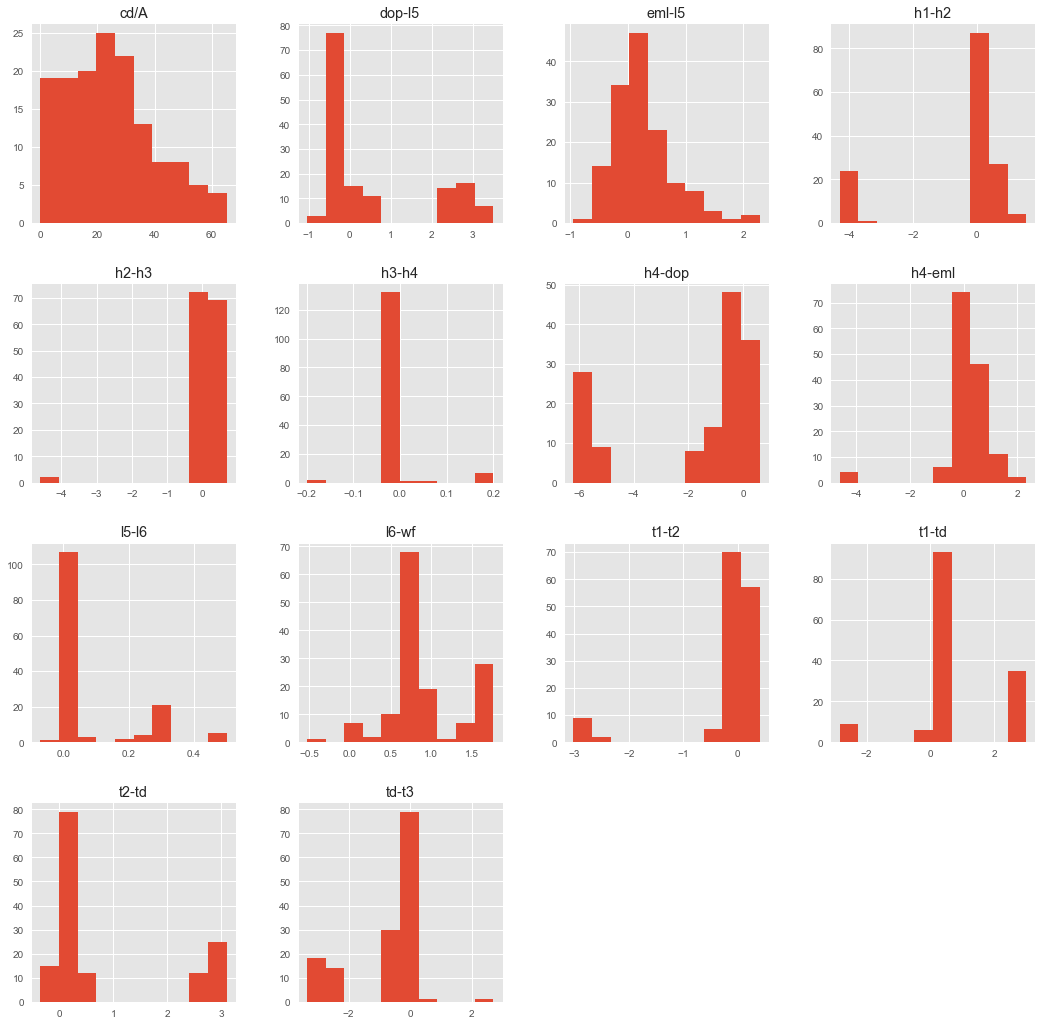

In [12]:
plt.rcParams['figure.figsize'] = (18.0, 18.0)
graph = df[list(df.columns)[:]]
graph.hist();

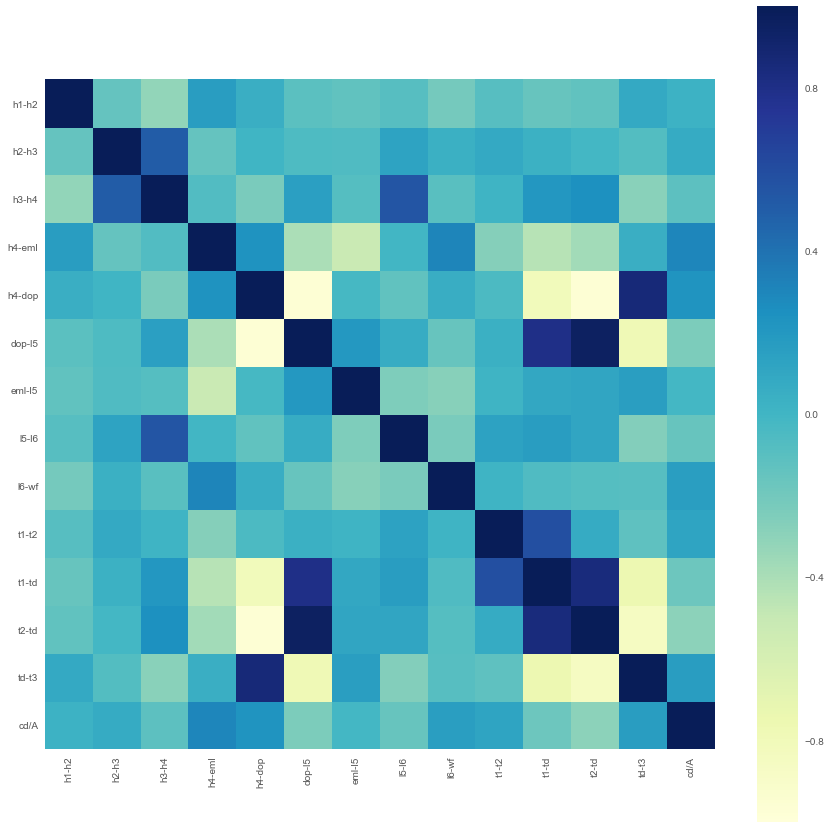

List the features in descending order of their correlation with cd/A:

h4-eml:   0.29752047029987727
t2-td:   -0.2934866608124896
dop-l5:   -0.23562980743347117
h4-dop:   0.2279970120981504
t1-td:   -0.1747552687593978
td-t3:   0.16978108993374227
l6-wf:   0.16042546526790674
l5-l6:   -0.15427337187532275
t1-t2:   0.11750928413770925
h3-h4:   -0.1145030959789374
h2-h3:   0.07803865451341323
h1-h2:   0.026437420302139407
eml-l5:   -0.013712046279923576


In [13]:
X = df[list(df.columns)[:]]
corr = X.select_dtypes(include = ['float64', 'int64']).iloc[:, :].corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, vmax=1, square=True, cmap="YlGnBu",linecolor='black', annot=False)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

cor_dict = corr['cd/A'].to_dict()
del cor_dict['cd/A']
print("List the features in descending order of their correlation with cd/A:\n")
for ele in sorted(cor_dict.items(), key=lambda x: -abs(x[1])):
    print("{0}:   {1}".format(*ele))

In [14]:
df.describe()

,h1-h2,h2-h3,h3-h4,h4-eml,h4-dop,dop-l5,eml-l5,l5-l6,l6-wf,t1-t2,t1-td,t2-td,td-t3,cd/A
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,-0.484336,0.158462,0.007343,0.131888,-1.753217,0.569790,0.262517,0.072238,0.913357,-0.163566,0.707692,0.871259,-0.788252,24.663656
std,1.732212,0.626536,0.049999,0.920903,2.389498,1.363279,0.517424,0.138266,0.444078,0.786173,1.474830,1.192957,1.208823,15.437201
min,-4.300000,-4.600000,-0.200000,-4.600000,-6.200000,-1.040000,-0.940000,-0.070000,-0.530000,-3.020000,-2.840000,-0.350000,-3.360000,0.000000
25%,0.000000,0.000000,0.000000,-0.065000,-4.910000,-0.300000,0.000000,0.000000,0.700000,-0.030000,0.170000,0.100000,-0.780000,12.000000
50%,0.200000,0.000000,0.000000,0.140000,-0.450000,-0.230000,0.200000,0.000000,0.770000,0.010000,0.280000,0.260000,-0.210000,22.500000
75%,0.300000,0.450000,0.000000,0.490000,-0.090000,2.500000,0.495000,0.000000,1.150000,0.115000,0.440000,2.615000,-0.050000,33.200000
max,1.560000,0.700000,0.200000,2.330000,0.600000,3.500000,2.280000,0.500000,1.760000,0.400000,3.000000,3.100000,2.700000,65.307692


In [15]:
X = df[list(df.columns)[:-1]]
y = df[['cd/A']]
print(X.shape)
X.head()

(143, 13)


,h1-h2,h2-h3,h3-h4,h4-eml,h4-dop,dop-l5,eml-l5,l5-l6,l6-wf,t1-t2,t1-td,t2-td,td-t3
0,0.6,0.1,0.0,-0.56,-0.39,0.29,1.41,0.3,0.70,0.09,0.42,0.33,-0.78
1,-3.7,0.0,0.0,-0.24,0.14,-0.27,0.71,0.0,1.57,0.03,0.17,0.14,-0.05
2,0.3,0.0,0.0,0.30,-0.20,-0.27,0.33,0.0,0.77,-0.13,0.17,0.30,-0.05
4,0.6,0.0,0.0,-0.45,-5.35,2.80,0.78,0.0,0.70,0.00,2.60,2.60,-2.60
9,-4.0,0.0,0.0,0.40,-1.10,0.53,0.18,0.0,1.57,0.07,0.28,0.21,-0.16


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

scaler = Normalizer()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Choose linear regression as our regressor from scikit-learn
regressor = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=-1)

regressor.fit(X_train, y_train)
y_predictions = regressor.predict(X_test)

# Check how our model is doing
print('R-squared: ', regressor.score(X_test, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))

kfold = KFold(n_splits=5, shuffle=True, random_state=2)
scores = cross_val_score(regressor, X, y, cv=kfold)
print('scores: ', scores)
print('mean score: ', scores.mean())

R-squared:  0.0945879676086
MS Error:  200.78799852
scores:  [-0.09348134  0.16118501  0.32335307 -1.1232939   0.13009951]
mean score:  -0.120427531139


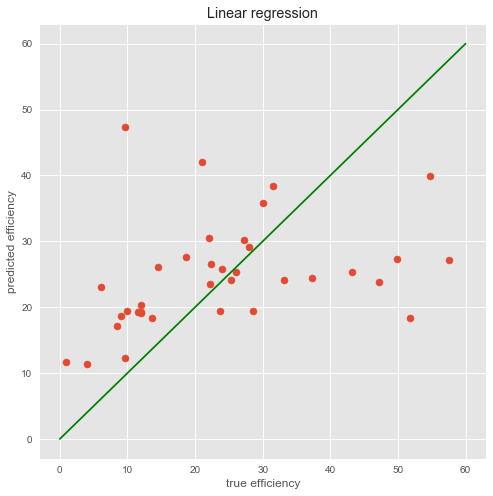

In [17]:
plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.scatter(y_test, y_predictions)
plt.plot([0, 60], [-0,60], 'g-', label='true line')
plt.xlabel('true efficiency')
plt.ylabel('predicted efficiency')
plt.title(' Linear regression ')
plt.show()

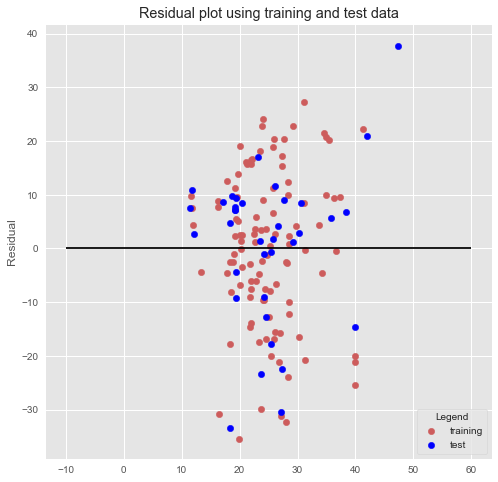

In [22]:
plt.scatter(regressor.predict(X_train), regressor.predict(X_train).reshape(len(X_train))-y_train.values.reshape(len(y_train)), c='indianred', s=40, 
           label='training')
plt.scatter(regressor.predict(X_test), regressor.predict(X_test).reshape(len(X_test))-np.asarray(y_test).reshape(len(y_test)), c='b', s=40,
            label ='test')
plt.hlines(y=0, xmin=-10, xmax=60)
plt.title('Residual plot using training and test data')
plt.ylabel('Residual')
plt.legend(loc=4, frameon=True, title='Legend');

In [23]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(random_state=2)
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

# Check how our model is doing
print('R-squared: ', regressor.score(X_test, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))

scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
print('scores: ', scores)
print('mean score: ', scores.mean())

R-squared:  0.720911123528
MS Error:  61.8919286592
scores:  [ 0.20441489  0.7566845   0.40959991 -0.07189734  0.54510225]
mean score:  0.368780842492


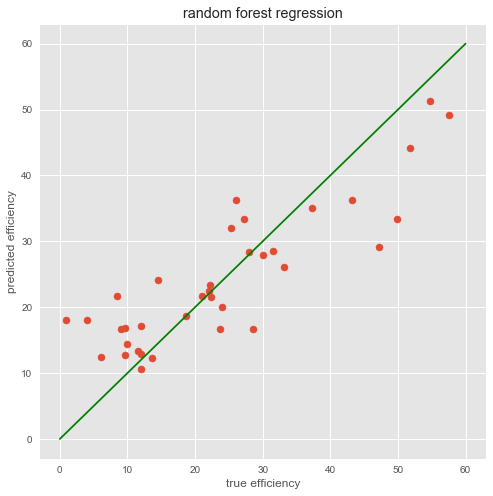

In [24]:
plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.scatter(y_test, y_predictions)
plt.plot([0, 60], [-0,60], 'g-', label='true line')
plt.xlabel('true efficiency')
plt.ylabel('predicted efficiency')
plt.title(' random forest regression ')
plt.show()

In [25]:
importance = regressor.feature_importances_.tolist()
names = list(X)

importance, names = zip(*sorted(zip(importance, names), reverse=True))

fmt = '{:<8}{:<20}{}'
print(fmt.format('', 'column', 'importance'))
for i, (name, coef) in enumerate(zip(names, importance)):
    print(fmt.format(i, name, coef))

        column              importance
0       h1-h2               0.26513719931448565
1       l6-wf               0.1551708093373559
2       td-t3               0.14853788907161447
3       dop-l5              0.07845950685129083
4       t1-td               0.07550052229355056
5       h2-h3               0.0624726457039715
6       h4-dop              0.053336389103878265
7       eml-l5              0.051492335974284174
8       h4-eml              0.04328328817954992
9       t2-td               0.033243295514854124
10      t1-t2               0.02616596060084475
11      l5-l6               0.005188935497167259
12      h3-h4               0.002011222557152535


In [26]:
importances = regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in regressor.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 0 (0.265137)
2. feature 8 (0.155171)
3. feature 12 (0.148538)
4. feature 5 (0.078460)
5. feature 10 (0.075501)
6. feature 1 (0.062473)
7. feature 4 (0.053336)
8. feature 6 (0.051492)
9. feature 3 (0.043283)
10. feature 11 (0.033243)
11. feature 9 (0.026166)
12. feature 7 (0.005189)
13. feature 2 (0.002011)


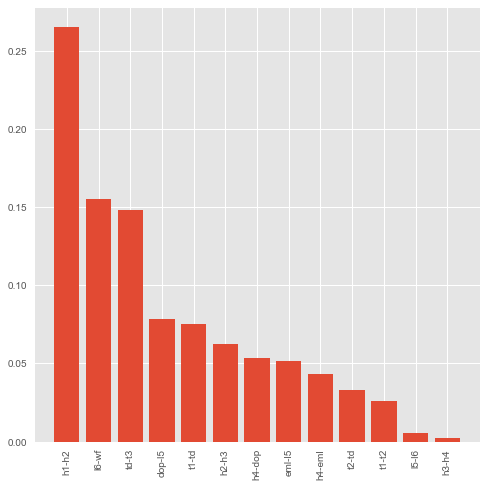

In [28]:
x = np.arange(13)
plt.bar(x, importance)
plt.xticks(x, names, rotation=90);

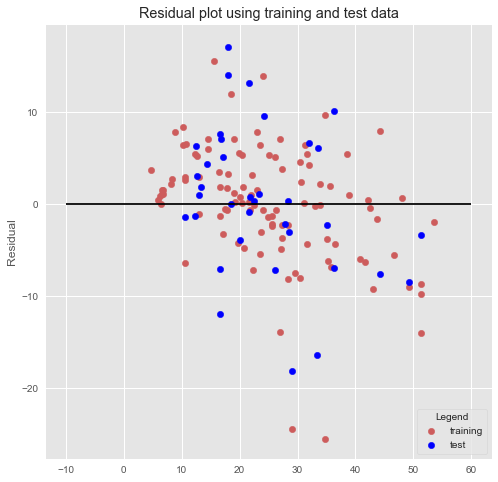

In [29]:
plt.scatter(regressor.predict(X_train), regressor.predict(X_train).reshape(len(X_train))-y_train.values.reshape(len(y_train)), c='indianred', s=40, 
           label='training')
plt.scatter(regressor.predict(X_test), regressor.predict(X_test).reshape(len(X_test))-np.asarray(y_test).reshape(len(y_test)), c='b', s=40,
            label ='test')
plt.hlines(y=0, xmin=-10, xmax=60)
plt.title('Residual plot using training and test data')
plt.ylabel('Residual')
plt.legend(loc=4, frameon=True, title='Legend');

In [30]:
from sklearn.neural_network import MLPRegressor
# choose regression algorithms
regressor = MLPRegressor(random_state=2, hidden_layer_sizes=(13, 5), activation='relu', solver='adam', max_iter=100000)
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

# Check how our model is doing
print('R-squared: ', regressor.score(X_test, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))

scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
print('scores: ', scores)
print('mean score: ', scores.mean())

R-squared:  0.352687664483
MS Error:  143.550719027
scores:  [-2.99039852  0.55987976  0.52751233 -6.10687426  0.14816093]
mean score:  -1.57234395491


In [31]:
from sklearn.svm import SVR

regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

# Check how our model is doing
print('R-squared: ', regressor.score(X_test, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))

scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
print('scores: ', scores)
print('mean score: ', scores.mean())

R-squared:  0.0108808607639
MS Error:  219.351240275
scores:  [ 0.09823114 -0.13228589  0.11969127 -0.04615598  0.16871411]
mean score:  0.041638929772


In [32]:
# from tpot import TPOTRegressor

# tpot = TPOTRegressor(generations=10, population_size=50, verbosity=2)
# tpot.fit(X_train, y_train.values.ravel())
# print(tpot.score(X_test, y_test))
# tpot.export('tpot_oled_pipeline.py')

In [33]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import MinMaxScaler
from tpot.builtins import StackingEstimator

# # NOTE: Make sure that the class is labeled 'target' in the data file
# tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
# features = tpot_data.drop('target', axis=1).values
# training_features, testing_features, training_target, testing_target = \
#             train_test_split(features, tpot_data['target'].values, random_state=42)

# Score on the training set was:-153.10421597838354
exported_pipeline = make_pipeline(
    VarianceThreshold(threshold=0.1),
    RBFSampler(gamma=0.75),
    MinMaxScaler(),
    StackingEstimator(estimator=ElasticNetCV(l1_ratio=0.05, tol=1e-05)),
    ExtraTreesRegressor(bootstrap=False, max_features=0.25, min_samples_leaf=2, min_samples_split=19, n_estimators=100)
)

exported_pipeline.fit(X_train, y_train.values.ravel())
y_pred = exported_pipeline.predict(X_test)

# Check how our model is doing
print('R-squared: ', exported_pipeline.score(X_test, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))

scores = cross_val_score(exported_pipeline, X, y.values.ravel(), cv=kfold)
print('scores: ', scores)
print('mean score: ', scores.mean())

C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


R-squared:  0.464619957541
MS Error:  219.351240275
scores:  [ 0.38177713  0.48156244  0.519037   -0.08651822  0.47237111]
mean score:  0.353645894249


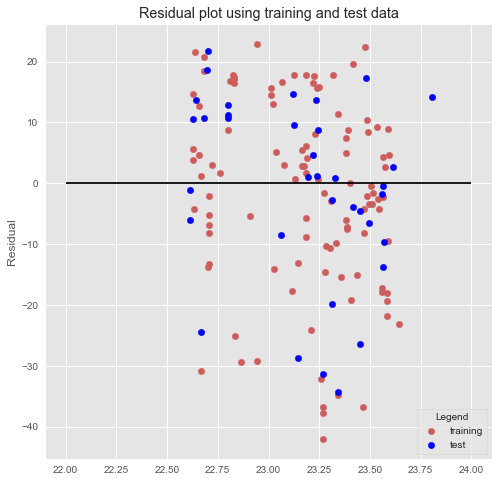

In [36]:
plt.scatter(regressor.predict(X_train), regressor.predict(X_train).reshape(len(X_train))-y_train.values.reshape(len(y_train)), c='indianred', s=40, 
           label='training')
plt.scatter(regressor.predict(X_test), regressor.predict(X_test).reshape(len(X_test))-np.asarray(y_test).reshape(len(y_test)), c='b', s=40,
            label ='test')
plt.hlines(y=0, xmin=22, xmax=24)
plt.title('Residual plot using training and test data')
plt.ylabel('Residual')
plt.legend(loc=4, frameon=True, title='Legend');